In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1] by dividing by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a channel dimension (since MNIST images are grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 4s 0us/step


In [3]:
# Build the CNN model
model = models.Sequential()

# 1st Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Fully connected layers (Dense layers)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output units (one for each digit)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 23s 28ms/step - loss: 0.2224 - accuracy: 0.9330 - val_loss: 0.0690 - val_accuracy: 0.9791
Epoch 2/5
750/750 [==============================] - 24s 33ms/step - loss: 0.0593 - accuracy: 0.9808 - val_loss: 0.0571 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0457 - val_accuracy: 0.9865
Epoch 4/5
750/750 [==============================] - 25s 34ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 5/5
750/750 [==============================] - 26s 34ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0460 - val_accuracy: 0.9862


In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc:.4f}')


313/313 [==============================] - 2s 5ms/step - loss: 0.0451 - accuracy: 0.9857
Test accuracy: 0.9857


313/313 [==============================] - 2s 5ms/step


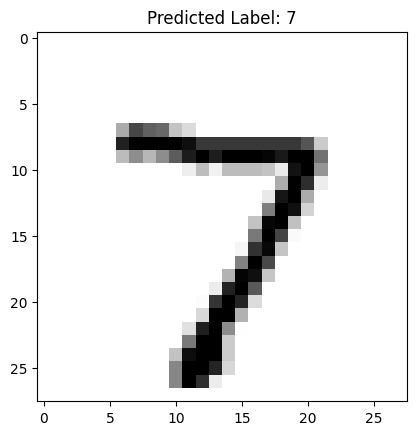

In [6]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Display an example prediction
def display_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {np.argmax(predictions[index])}')
    plt.show()

# Display prediction for the first test image
display_prediction(0)


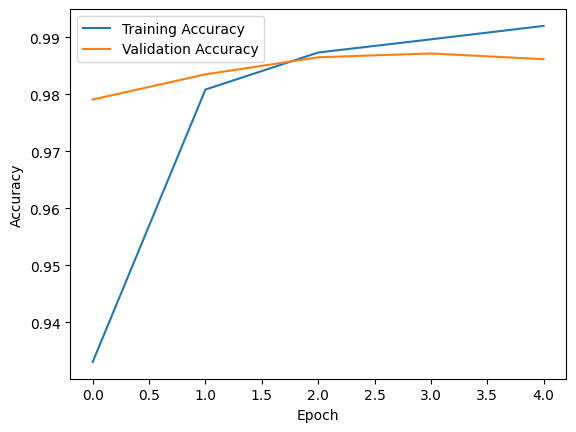

In [7]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()